Connected to Python 3.13.2

K-means 準確率: 0.9267


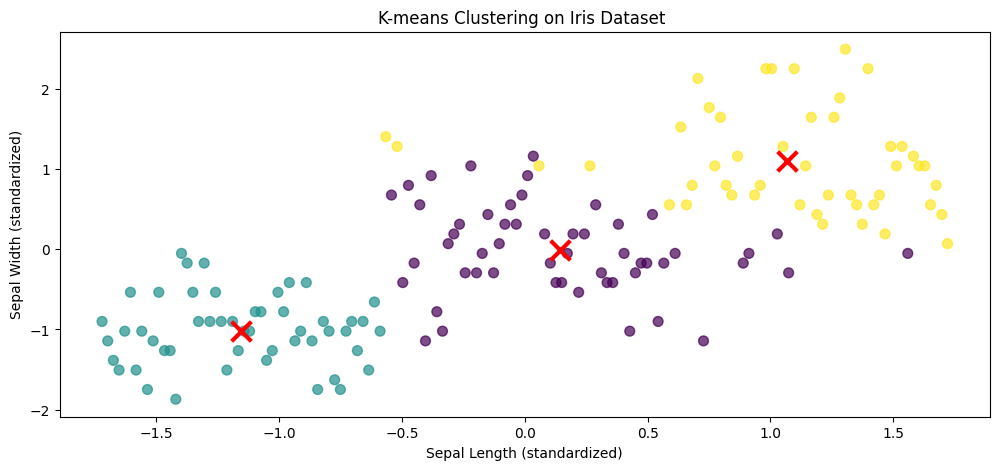

In [ ]:
import random
import math
import pandas as pd
import numpy as np
iris = pd.read_csv("iris.csv")

# k-means 演算法
# 1.設定好分幾群(可用elbow方法探測) 隨機k個群心
# 2.計算歐式距離
# 3.分給最近的群心
# 4.被分配好的資料用來更新群心
# 5.重複步驟直到群心湄變化

class Kmeans():
    #定義初始化的數據
    def __init__(self, k_cluster = 3 , max_iter =300 ,random_seed =None):
        self.k_cluster = k_cluster
        self.max_iter = max_iter
        self.random_seed = random_seed
        self.centroids = None
        self.labels = None

    #隨機選出k個初始點
    def _initial_centroids(self,X):
        np.random.seed(self.random_seed)
        random_idx = np.random.permutation(len(X))
        centroids = X[random_idx[:self.k_cluster]]
        return centroids   
    #計算距離
    def _distance(self,X,centroids):
        distances = np.zeros((len(X), self.k_cluster))  #創一個零矩陣儲存
        for i, centroid in enumerate(centroids):        #計算每一個點的距離
            distances[:, i] = np.sqrt(((X - centroid) ** 2).sum(axis=1))
        return distances  #回傳
    #分配點給群心
    def _assign_clusters(self,distances):
        return np.argmin(distances,axis = 1) #回傳最小值的距離
    #更新群心
    def _updated_centroids(self ,X , labels ):
        centroids =[]
        
        for i in range(self.k_cluster):
            cluster_points = X[labels == i]   #找出該群資料點
            if len(cluster_points) > 0:
              centroids.append(np.mean(cluster_points, axis=0))  #計算新的中心點
            else:
              centroids.append(np.zeros(X.shape[1]))  # 該群無資料設為0
        return np.array(centroids)
    def fit(self, X):
        self.centroids = self._initial_centroids(X)
        for _ in range(self.max_iter):
            distances = self._distance(X, self.centroids)
            self.labels = self._assign_clusters(distances)
            new_centroids = self._updated_centroids(X, self.labels)
            if np.allclose(self.centroids, new_centroids):  #中心點沒變就結束
                break   
            self.centroids = new_centroids
    
    def predict(self, X):
        distances = self._distance(X, self.centroids)
        return self._assign_clusters(distances)
# 定義混淆矩陣計算
def confusion_matrix(y_true, y_pred, k):
    # 確保true 跟 predict 是整數
    y_true = y_true.astype(int)
    y_pred = y_pred.astype(int)
    
    mat = [[0]*k for _ in range(k)] #生成一個K乘K的矩陣 [0]*k 常為K內容0的list
    for t, p in zip(y_true, y_pred): #把兩個序列元素配對
        mat[t][p] += 1              #第 t 列第 p 欄 的值加 1
    return mat

# 定義準確率計算
def best_accuracy(conf_mat):
    from itertools import permutations
    
    k = len(conf_mat)
    best = 0          #初始化
    total = sum(sum(row) for row in conf_mat) #計算樣本總數
    
    # 嘗試所有可能的標籤排列組合
    for perm in permutations(range(k)):  #產生並逐一遍歷所有從 0..k-1 的排列
        current = 0                      #初始化正確的
        for i in range(k):
            current += conf_mat[i][perm[i]]  #對於真實類別 i，檢查它被預測為 perm[i] 的次數，並累加到 current。
        if current > best:
            best = current
    
    return best / total


if __name__ == "__main__":    
    
  X = iris.iloc[:, :4].values  #最後一個為類別 取前四個
  y = iris.iloc[:, -1].values  #取最後species



# 將類別標籤轉換為數字 (0, 1, 2)
unique_labels = np.unique(y)
label_to_num = {label: i for i, label in enumerate(unique_labels)}
y_numeric = np.array([label_to_num[label] for label in y])
    
   
X = (X - X.mean(axis=0)) / X.std(axis=0)  # 標準化數據
    
    
kmeans = Kmeans(k_cluster=3, random_seed=42)
kmeans.fit(X)    # 訓練K-means
y_pred = kmeans.labels
    
    
conf_mat = confusion_matrix(y_numeric, y_pred, 3)   # 計算混淆矩陣
accuracy = best_accuracy(conf_mat)          # 計算準確率
print(f"K-means 準確率: {accuracy:.4f}")
    



#畫圖
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 5))
plt.scatter(X[:, 0], X[:, 1], c=y_pred, cmap='viridis', s=50, alpha=0.7)
plt.scatter(kmeans.centroids[:, 0], kmeans.centroids[:, 1], c='red', marker='x', s=200, linewidths=3)
plt.xlabel('Sepal Length (standardized)')
plt.ylabel('Sepal Width (standardized)')
plt.title('K-means Clustering on Iris Dataset ')
plt.show()

Connected to Python 3.12.9

K-means 準確率: 0.9267


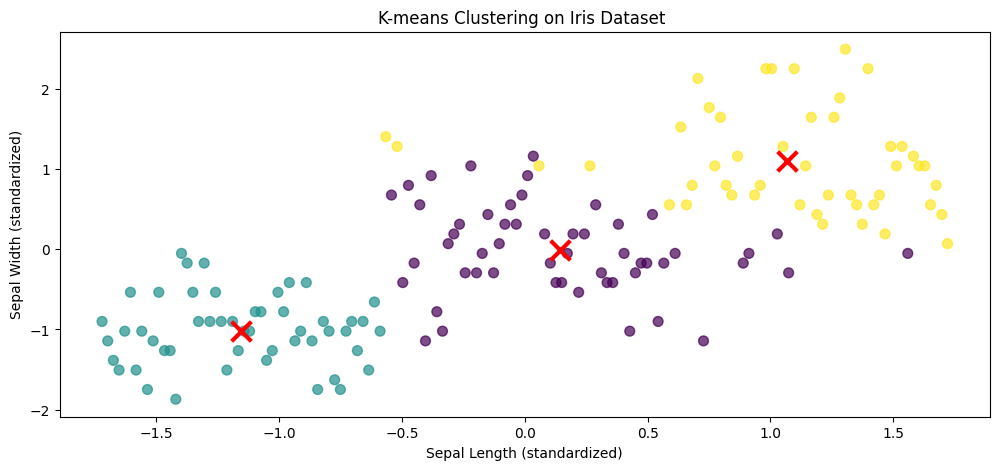

In [ ]:
import random
import math
import pandas as pd
import numpy as np
iris = pd.read_csv("iris.csv")

# k-means 演算法
# 1.設定好分幾群(可用elbow方法探測) 隨機k個群心
# 2.計算歐式距離
# 3.分給最近的群心
# 4.被分配好的資料用來更新群心
# 5.重複步驟直到群心湄變化

class Kmeans():
    #定義初始化的數據
    def __init__(self, k_cluster = 3 , max_iter =300 ,random_seed =None):
        self.k_cluster = k_cluster
        self.max_iter = max_iter
        self.random_seed = random_seed
        self.centroids = None
        self.labels = None

    #隨機選出k個初始點
    def _initial_centroids(self,X):
        np.random.seed(self.random_seed)
        random_idx = np.random.permutation(len(X))
        centroids = X[random_idx[:self.k_cluster]]
        return centroids   
    #計算距離
    def _distance(self,X,centroids):
        distances = np.zeros((len(X), self.k_cluster))  #創一個零矩陣儲存
        for i, centroid in enumerate(centroids):        #計算每一個點的距離
            distances[:, i] = np.sqrt(((X - centroid) ** 2).sum(axis=1))
        return distances  #回傳
    #分配點給群心
    def _assign_clusters(self,distances):
        return np.argmin(distances,axis = 1) #回傳最小值的距離
    #更新群心
    def _updated_centroids(self ,X , labels ):
        centroids =[]
        
        for i in range(self.k_cluster):
            cluster_points = X[labels == i]   #找出該群資料點
            if len(cluster_points) > 0:
              centroids.append(np.mean(cluster_points, axis=0))  #計算新的中心點
            else:
              centroids.append(np.zeros(X.shape[1]))  # 該群無資料設為0
        return np.array(centroids)
    def fit(self, X):
        self.centroids = self._initial_centroids(X)
        for _ in range(self.max_iter):
            distances = self._distance(X, self.centroids)
            self.labels = self._assign_clusters(distances)
            new_centroids = self._updated_centroids(X, self.labels)
            if np.allclose(self.centroids, new_centroids):  #中心點沒變就結束
                break   
            self.centroids = new_centroids
    
    def predict(self, X):
        distances = self._distance(X, self.centroids)
        return self._assign_clusters(distances)
# 定義混淆矩陣計算
def confusion_matrix(y_true, y_pred, k):
    # 確保true 跟 predict 是整數
    y_true = y_true.astype(int)
    y_pred = y_pred.astype(int)
    
    mat = [[0]*k for _ in range(k)] #生成一個K乘K的矩陣 [0]*k 常為K內容0的list
    for t, p in zip(y_true, y_pred): #把兩個序列元素配對
        mat[t][p] += 1              #第 t 列第 p 欄 的值加 1
    return mat

# 定義準確率計算
def best_accuracy(conf_mat):
    from itertools import permutations
    
    k = len(conf_mat)
    best = 0          #初始化
    total = sum(sum(row) for row in conf_mat) #計算樣本總數
    
    # 嘗試所有可能的標籤排列組合
    for perm in permutations(range(k)):  #產生並逐一遍歷所有從 0..k-1 的排列
        current = 0                      #初始化正確的
        for i in range(k):
            current += conf_mat[i][perm[i]]  #對於真實類別 i，檢查它被預測為 perm[i] 的次數，並累加到 current。
        if current > best:
            best = current
    
    return best / total


if __name__ == "__main__":    
    
  X = iris.iloc[:, :4].values  #最後一個為類別 取前四個
  y = iris.iloc[:, -1].values  #取最後species



# 將類別標籤轉換為數字 (0, 1, 2)
unique_labels = np.unique(y)
label_to_num = {label: i for i, label in enumerate(unique_labels)}
y_numeric = np.array([label_to_num[label] for label in y])
    
   
X = (X - X.mean(axis=0)) / X.std(axis=0)  # 標準化數據
    
    
kmeans = Kmeans(k_cluster=3, random_seed=42)
kmeans.fit(X)    # 訓練K-means
y_pred = kmeans.labels
    
    
conf_mat = confusion_matrix(y_numeric, y_pred, 3)   # 計算混淆矩陣
accuracy = best_accuracy(conf_mat)          # 計算準確率
print(f"K-means 準確率: {accuracy:.4f}")
    



#畫圖
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 5))
plt.scatter(X[:, 0], X[:, 1], c=y_pred, cmap='viridis', s=50, alpha=0.7)
plt.scatter(kmeans.centroids[:, 0], kmeans.centroids[:, 1], c='red', marker='x', s=200, linewidths=3)
plt.xlabel('Sepal Length (standardized)')
plt.ylabel('Sepal Width (standardized)')
plt.title('K-means Clustering on Iris Dataset ')
plt.show()